## Третья лабораторная работа

# **FIRST** TASK

*Brief description*:

`1.	Сгенерировать все возможные перестановки элементов 1, ... ,n. Использовать алгоритм Нарайана, Джонсона-Троттере, вектора инверсий. Выполнить сравнительный анализ времени работы `

### Permutations Algorithms
**Narayana** algorithm

In [2]:
def narayana(input_a: list):
    a = input_a.copy()
    k = 0
    l = 0
    a1 = [ind for ind in range(len(a)-1) if a[ind] < a[ind+1]]
    if a1:
        k = max(a1)
    else:
        return a
    l = max(ind for ind in range(len(a)) if a[k] < a[ind]) 
    a[k], a[l] = a[l], a[k]

    ans = a[:k+1]
    rev = list(reversed(a[k+1:]))
    ans.extend(rev)
    
    return ans

In [3]:
def narayana_permutations(n):
    a = list(range(1, n+1))
    prev = narayana(a)
    permutations = [a]
    curr = []
    if n != 1: permutations.append(prev) 

    while prev != curr:
        if len(curr) > 0:
            permutations.append(curr) 
            new_res = narayana(curr)
            prev = curr
        else: 
            new_res = narayana(prev)
        curr = new_res

        # prev, res = res, new_res
        # permutations.append(res) 
        # print('prev vs curr', prev, curr)

    return permutations

In [4]:
# a = [3, 7, 1, 4]

perms = narayana_permutations(5)
print(len(perms))
perms

120


[[1, 2, 3, 4, 5],
 [1, 2, 3, 5, 4],
 [1, 2, 4, 3, 5],
 [1, 2, 4, 5, 3],
 [1, 2, 5, 3, 4],
 [1, 2, 5, 4, 3],
 [1, 3, 2, 4, 5],
 [1, 3, 2, 5, 4],
 [1, 3, 4, 2, 5],
 [1, 3, 4, 5, 2],
 [1, 3, 5, 2, 4],
 [1, 3, 5, 4, 2],
 [1, 4, 2, 3, 5],
 [1, 4, 2, 5, 3],
 [1, 4, 3, 2, 5],
 [1, 4, 3, 5, 2],
 [1, 4, 5, 2, 3],
 [1, 4, 5, 3, 2],
 [1, 5, 2, 3, 4],
 [1, 5, 2, 4, 3],
 [1, 5, 3, 2, 4],
 [1, 5, 3, 4, 2],
 [1, 5, 4, 2, 3],
 [1, 5, 4, 3, 2],
 [2, 1, 3, 4, 5],
 [2, 1, 3, 5, 4],
 [2, 1, 4, 3, 5],
 [2, 1, 4, 5, 3],
 [2, 1, 5, 3, 4],
 [2, 1, 5, 4, 3],
 [2, 3, 1, 4, 5],
 [2, 3, 1, 5, 4],
 [2, 3, 4, 1, 5],
 [2, 3, 4, 5, 1],
 [2, 3, 5, 1, 4],
 [2, 3, 5, 4, 1],
 [2, 4, 1, 3, 5],
 [2, 4, 1, 5, 3],
 [2, 4, 3, 1, 5],
 [2, 4, 3, 5, 1],
 [2, 4, 5, 1, 3],
 [2, 4, 5, 3, 1],
 [2, 5, 1, 3, 4],
 [2, 5, 1, 4, 3],
 [2, 5, 3, 1, 4],
 [2, 5, 3, 4, 1],
 [2, 5, 4, 1, 3],
 [2, 5, 4, 3, 1],
 [3, 1, 2, 4, 5],
 [3, 1, 2, 5, 4],
 [3, 1, 4, 2, 5],
 [3, 1, 4, 5, 2],
 [3, 1, 5, 2, 4],
 [3, 1, 5, 4, 2],
 [3, 2, 1, 4, 5],
 [3, 2, 1,

In [5]:
narayana([3, 1, 7])

[3, 7, 1]

In [6]:
a = [1,3,7]
print(a)
for ind in range(len(a)-1, 0, -1):
    a[ind], a[ind-1] = a[ind-1], a[ind]
    print(a)

# a

[1, 3, 7]
[1, 7, 3]
[7, 1, 3]


In [7]:
a = [1, 2]
directions = ['left']*len(a)
directions

['left', 'left']

In [8]:
d = {1:2, 1:5, 2:5}
d[1]

5

In [9]:
ar = [1, 2, 3]
for i in range(len(ar)):
    if i == 0:
        ar[i], ar[i+1] = ar[i+1], ar[i]
ar

[2, 1, 3]

**Johnson-Trotter** algorithm

In [10]:
# 1 3 7
# 1 7 3
# 7 1 3

def johnson_trotter_permutations(n):
    
    def get_largest_mobile(a, directions):
        max_mobile = None
        max_index = -1
        for i in range(len(a)):
            if directions[i] == 'left' and i>0 and a[i]>a[i-1]:
                if max_mobile is None or a[i] > max_mobile:
                    max_mobile, max_index = a[i], i
            elif directions[i] == 'right' and i<len(a)-1 and a[i]>a[i+1]:
                if max_mobile is None or a[i] > max_mobile:
                    max_mobile, max_index = a[i], i
        return max_index
     
    def swap(a, directions, i):
        if directions[i] == 'left':
            a[i], a[i-1] = a[i-1], a[i]
            directions[i], directions[i-1] = directions[i-1], directions[i] 
            return i - 1
        
        a[i], a[i+1] = a[i+1], a[i]
        directions[i], directions[i+1] = directions[i+1], directions[i] 
        return i + 1
    
    def flip_directions(a, directions, max_mobile):
        for i in range(len(a)):
            if a[i] > max_mobile:
                directions[i] = 'right' if directions[i] == 'left' else 'left'


    a = list(range(1, n+1))
    a.sort()
    directions = ['left'] * n
    permutations = [a.copy()]
    while True:
        max_index = get_largest_mobile(a, directions)
        if max_index == -1:
            break

        max_mobile = a[max_index]
        new_index = swap(a, directions, max_index)
        flip_directions(a, directions, max_mobile)

        permutations.append(a.copy())
    return permutations


In [11]:
# a = [1, 3, 7, 6]
res = johnson_trotter_permutations(3)
print(len(res))

for el in res:
    print(el)

6
[1, 2, 3]
[1, 3, 2]
[3, 1, 2]
[3, 2, 1]
[2, 3, 1]
[2, 1, 3]


**Inversion vector** algorithm

In [12]:
def generate_inversion_vectors(n: int):
    '''
    Generate inversion vectors given the dimension
    Parameters:
        n (int): vector dimension
    
    Returns:
        inversion_vectors (list): list of generated inversion vectors
    '''
    # inversion_vectors = []

    def backtrack(current, index):
        if index == n:
            yield list(reversed(current[:]))
            return
        
        for value in range(index + 1):  # Values range from 0 to index
            current[index] = value
            yield from backtrack(current, index + 1)  # Recurse to the next index
    
    # Start with an empty inversion vector
    yield from backtrack([0] * n, 0)
    
    # return inversion_vectors

def generate_permutations(input_inv_vectors: list):
    '''
    Generates n! permutations from inversed vectors given

    Parameters:
        input_inv_vectors (list): inversed vectors

    Returns:
        permutations (list): permutations of initial [1, ... ,n] 
    '''
    # inv_vectors = input_inv_vectors[:]  # Copy the inversion vectors
    n = len(next(iter(input_inv_vectors)))  # Length of the vectors
    initial = list(range(1, n+1))  # Initial sequence [1, 2, ..., n]
    yield initial
    
    permutations = []

    for inv_vector in input_inv_vectors:
        new_vec = []  # Start with an empty permutation
        init = initial[:]  # Copy the initial numbers
        # inv_v = inv_vector[:]  # Copy the inversion vector to avoid modification

        # Process elements from right to left (highest to lowest index)
        for i in range(n-1, -1, -1):
            index = inv_vector[i]  # Get index from inversion vector
            new_vec.insert(index, init.pop())  # Insert element at the correct position
        
        yield new_vec
    
    return permutations    

def inversion_vectors_permutations(n: int) -> list:
    inv_vectors = generate_inversion_vectors(n=n)
    perms = generate_permutations(inv_vectors)
    
    return list(perms)

In [13]:
perms = inversion_vectors_permutations(3)
perms, len(perms)

([[1, 2, 3], [2, 1, 3], [2, 3, 1], [1, 3, 2], [3, 1, 2], [3, 2, 1]], 6)

### **TEST TIME, yeay!**

In [14]:
n_values = list(range(1, 10))

In [15]:
import time

def get_execution_time(n_values: list[int], method: callable) -> list:
    time_values = []
    for n in n_values:
        st = time.time()
        res = method(n)
        end = time.time()
        print('----------------------')
        print('n: ', n)
        time_values.append(end-st)
    return time_values

In [16]:
narayana_time_values = get_execution_time(n_values, narayana_permutations)

----------------------
n:  1
----------------------
n:  2
----------------------
n:  3
----------------------
n:  4
----------------------
n:  5
----------------------
n:  6
----------------------
n:  7
----------------------
n:  8
----------------------
n:  9


In [17]:
johnson_time_values = get_execution_time(n_values, johnson_trotter_permutations)

----------------------
n:  1
----------------------
n:  2
----------------------
n:  3
----------------------
n:  4
----------------------
n:  5
----------------------
n:  6
----------------------
n:  7
----------------------
n:  8
----------------------
n:  9


In [18]:
inv_vectors_time_values = get_execution_time(n_values, inversion_vectors_permutations)

----------------------
n:  1
----------------------
n:  2
----------------------
n:  3
----------------------
n:  4
----------------------
n:  5
----------------------
n:  6
----------------------
n:  7
----------------------
n:  8
----------------------
n:  9


In [44]:
import matplotlib.pyplot as plt

def plotting_time_analysis_results(n_values: list, Methods_Values: list[list], Methods_Names: list[str]):

    # plt.plot(n_values, narayana_time_values)

    for i, method_time_values in enumerate(Methods_Values):
        plt.plot(n_values, method_time_values, label=Methods_Names[i])
    plt.xlabel('n values')
    plt.ylabel('time')
    # plt.show()
    # plt.plot(n_values, johnson_time_values)
    # plt.show()
        
    # plt.plot(n_values, inv_vectors_time_value/s)
    
    plt.legend()
    # plt.legend(Methods_Names)
    
    # plt.legend(['narayana', 'johnson-trotter', 'inversion vectors'])

    plt.show()

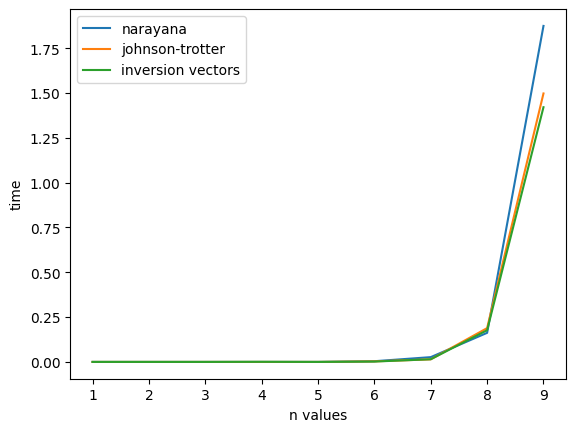

In [48]:
plotting_time_analysis_results(n_values, [narayana_time_values, johnson_time_values, inv_vectors_time_values], ['narayana', 'johnson-trotter', 'inversion vectors'])

# **SECOND TASK**

*Brief description*:

`2.	Дано множество элементов целого типа, сгенерировать все возможные комбинации перестановок элементов (элементы могут повторяться, каждая сгенерированная подпоследовательность должна быть уникальной).`

In [21]:
from itertools import combinations

for x in combinations([1, 1, 2], 3):
    print(x)

(1, 1, 2)


In [22]:
# narayana implementation
def get_unique_permutations(a: list[int]):
    prev = narayana(a)
    combinations = [a]
    curr = []
    if len(a) != 1: combinations.append(prev) 

    while prev != curr:
        if len(curr) > 0 and curr not in combinations:
            combinations.append(curr) 
            new_res = narayana(curr)
            prev = curr
        else: 
            new_res = narayana(prev)
        curr = new_res

    return combinations

In [23]:
# get_unique_permutations(a[:length])

In [24]:
get_unique_permutations([1,1,2])

[[1, 1, 2], [1, 2, 1], [2, 1, 1]]

In [25]:
get_unique_permutations([1,2,3])


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

# **THIRD TASK**

*Brief description*:

`3.Пусть задано n-элементов. Необходимо перебрать все возможные варианты выборки из этих элементов (выборки по одному элементу, по два ,…, из n элементов). Пример элементов: стол, стул, шкаф`

Поскольку условием не уточняется, могут ли элементы выборки дублироваться, для определённости примем, что <ins>НЕ МОГУТ </ins>

In [26]:
def all_possible_combinations(a: list):
    possible_combinations = []
    for length in range(1, len(a)+1):
        print('length:', length)
        for i in range(len(a)):
            if len(a[i:i+length]) == length:
                print(a[i:i+length])
                # possible_combinations.extend([get_unique_permutations([a[i]]) for i in range(0, len(a), length)])
            # else:
                # print(a[i])
        # possible_combinations.append(get_unique_permutations(a[:length]))
    return possible_combinations

In [27]:
b = [1,2,3,4]
all_possible_combinations(b)

length: 1
[1]
[2]
[3]
[4]
length: 2
[1, 2]
[2, 3]
[3, 4]
length: 3
[1, 2, 3]
[2, 3, 4]
length: 4
[1, 2, 3, 4]


[]

In [28]:
from copy import deepcopy
import numpy as np

# Рекурсивная функция для генерации всех комбинаций заданной длины
def get_combinations(arr, length, start=0, current=None, result=None):
    if current is None:
        current = []
    if result is None:
        result = []
    if len(current) == length:
        result.append(deepcopy(current))
        return result
    for i in range(start, len(arr)):
        current.append(arr[i])
        get_combinations(arr, length, i + 1, current, result)
        current.pop()
    return result

def all_possible_combinations(a: list[int]):
    possible_combinations = []

    for length in range(1, len(a) + 1):
        comb = get_combinations(a, length)
        possible_combinations.extend(comb)

    return possible_combinations


In [29]:
all_possible_combinations([1, 2, 3, 4])

[[1],
 [2],
 [3],
 [4],
 [1, 2],
 [1, 3],
 [1, 4],
 [2, 3],
 [2, 4],
 [3, 4],
 [1, 2, 3],
 [1, 2, 4],
 [1, 3, 4],
 [2, 3, 4],
 [1, 2, 3, 4]]

In [30]:
from random import randint
arrays = [[randint(1, 1_000) for _ in range(length)] for length in range(1, 8)]
all_poss_combination_time = get_execution_time(arrays, method=all_possible_combinations)

unique_perms_time = get_execution_time(arrays, method=get_unique_permutations)

----------------------
n:  [320]
----------------------
n:  [382, 269]
----------------------
n:  [325, 492, 769]
----------------------
n:  [969, 654, 365, 650]
----------------------
n:  [992, 669, 598, 622, 585]
----------------------
n:  [922, 846, 392, 449, 93, 68]
----------------------
n:  [712, 120, 567, 178, 489, 1000, 151]
----------------------
n:  [320]
----------------------
n:  [382, 269]
----------------------
n:  [325, 492, 769]
----------------------
n:  [969, 654, 365, 650]
----------------------
n:  [992, 669, 598, 622, 585]
----------------------
n:  [922, 846, 392, 449, 93, 68]
----------------------
n:  [712, 120, 567, 178, 489, 1000, 151]


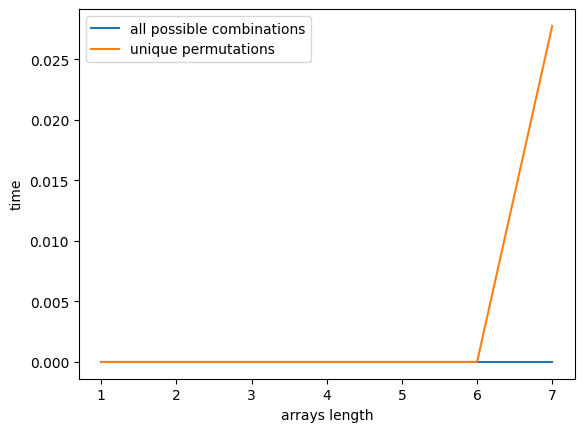

In [31]:
plt.plot([len(a) for a in arrays], all_poss_combination_time)
plt.plot([len(a) for a in arrays], unique_perms_time)

plt.xlabel('arrays length')
plt.ylabel('time')
plt.legend(['all possible combinations', 'unique permutations'])
plt.show()

# **FORTH TASK**

`4.	Студент Петров П.П. имеет некоторую сумму денег для покупки канцелярских принадлежностей. Он составил список необходимых канцелярских принадлежностей с указанием их названия и количества. Пусть имеется прейскурант цен магазина, в котором указаны наименования товаров с указанием цены. Определить, какие канцелярские принадлежности и в каком количестве может купить студент в пределах выделенной суммы при условии, что количество наименований в списке покупок должно быть максимально.`

In [32]:
# dict = 
# ручка - 100р
# карандаш - 20р
# тетрадь - 50р
# дневник - 200р
# маркеры - 300р
# фломастеры - 150р

# QUESTION: HOW MANY and WHAT THINGS (if he needs to buy MAX unique things)

# SOLUTION:
# sort(dict, key=d.values)

# ---------------------------------------
# IS THAT A CASE?! 
# {'pen': 30, 'eraser': 10, 'pencil': 40, 'correcter': 50} - min
# ['marker': 100, 'pen': 20, 50, 'highligter': 200]

# unique(things) -> max
# money = const (1000р)

# choose COMBINATION where the sum is min - 1st iteration
# then: take [max(el for el in comb if el not in CART) for comb in combinations]


In [33]:
things = {
    'ручка': 100,
    'карандаш': 20,
    'тетрадь': 50,
    'дневник':200,
    'маркеры': 300,
    'фломастеры': 150}

def solution(things: dict, money: float):
    cart = {thing: 0 for thing in things.keys()} # thing: how many bought
    things = dict(sorted(things.items(), key=lambda item: item[1]))
    # print(things)
    while money:
        for thing, price in things.items():
            if money-price >= 0:
                cart[thing] += 1
                money -= price
        if money < min(things.values()):
            break
    return cart

In [34]:
dict(sorted(things.items(), key=lambda item: item[1]))

{'карандаш': 20,
 'тетрадь': 50,
 'ручка': 100,
 'фломастеры': 150,
 'дневник': 200,
 'маркеры': 300}

In [35]:
solution(things, money=1_300)

{'ручка': 2,
 'карандаш': 5,
 'тетрадь': 4,
 'дневник': 1,
 'маркеры': 1,
 'фломастеры': 2}

In [36]:
solution(things, money=3_000)

{'ручка': 4,
 'карандаш': 5,
 'тетрадь': 4,
 'дневник': 4,
 'маркеры': 3,
 'фломастеры': 4}